In [0]:
# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
from sklearn.preprocessing import StandardScaler
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
#np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1Yq4_LBfACUdiScna5dfP9u6rGKpoH6Qe' # The shareable link data_CICIDS_2019.csv

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1Yq4_LBfACUdiScna5dfP9u6rGKpoH6Qe


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data_CICIDS_2019.csv')  
df3 = pd.read_csv('data_CICIDS_2019.csv',delimiter=',')

In [0]:
#train=df3.select_dtypes(include=['float64'])
train = df3
#print(data_select)
#Data = data_select.to_numpy
# print(Data)
#Data['col_name'] = pd.to_numeric(Data['col_name'], errors='coerce')
#print(Data)
#train = StandardScaler().fit_transform(data_select)
del df3
print(train.shape)

(2886122, 80)


In [0]:
train = pd.read_csv("Train_data.csv")
test = pd.read_csv("Test_data.csv")

In [0]:
# untuk print data 4 baris teratas
print(train.head(4))

print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                       6   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       6    

In [0]:
print(test.head(4))

print("Testing data has {} rows & {} columns".format(test.shape[0],test.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp   private  REJ          0          0     0   
1         0           tcp   private  REJ          0          0     0   
2         2           tcp  ftp_data   SF      12983          0     0   
3         0          icmp     eco_i   SF         20          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0 

In [0]:
# Descriptive statistics of data
train.describe()

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2886122.0,2.886122e+06,2886122.0,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2886122.0,2886122.0,2886122.0,2886122.0,2886122.0,2886122.0,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06,2.886122e+06
mean,2.188494e+05,8.144987e+03,1.503662e+07,8.670044e+00,9.488161e+00,5.793662e+02,1.443973e+04,2.358357e+02,1.919562e+01,6.713030e+01,8.160908e+01,1.044389e+03,3.840922e+01,3.602823e+02,4.178804e+02,1.340982e+06,3.101006e+06,9.804303e+06,1.530109e+05,1.469000e+07,2.640059e+06,3.541238e+06,9.635783e+06,9.456582e+05,9.553504e+06,1.734102e+06,1.532688e+06,4.742760e+06,8.933204e+05,4.556252e-02,0.0,1.091430e-04,0.0,-2.551033e+04,-2.244939e+03,6.077354e+04,6.617856e+03,1.544550e+01,1.158682e+03,2.030304e+02,3.666981e+02,6.907572e+05,3.426986e-02,4.556252e-02,2.276411e-04,3.057948e-01,3.331432e-01,9.732021e-02,1.091430e-04,2.286806e-04,7.092867e-01,2.264986e+02,6.713030e+01,3.602823e+02,-2.551033e+04,0.0,0.0,0.0,0.0,0.0,0.0,8.670044e+00,5.793560e+02,9.488161e+00,1.443944e+04,6.819626e+03,1.855860e+03,4.869338e+00,-2.688910e+03,9.005500e+04,3.859629e+04,1.568004e+05,6.811125e+04,8.745993e+06,7.689559e+05,9.312779e+06,8.165510e+06
std,1.639334e+05,1.840694e+04,3.358786e+07,6.904967e+02,9.186343e+02,9.761302e+03,2.077595e+06,8.782946e+02,7.468339e+01,2.327570e+02,3.571746e+02,2.231428e+03,6.756108e+01,6.896062e+02,9.875366e+02,4.410977e+06,8.124277e+06,2.512334e+07,2.854893e+06,3.352363e+07,9.287301e+06,9.965852e+06,2.525315e+07,8.265736e+06,2.814437e+07,8.586148e+06,6.347806e+06,1.730389e+07,7.987791e+06,2.085344e-01,0.0,1.044658e-02,0.0,2.084990e+07,1.438191e+06,2.417154e+05,3.707574e+04,2.460504e+01,2.339312e+03,3.498525e+02,7.458861e+02,2.085042e+06,1.819215e-01,2.085344e-01,1.508607e-02,4.607433e-01,4.713373e-01,2.963933e-01,1.044658e-02,1.512046e-02,7.784672e-01,3.833177e+02,2.327570e+02,6.896062e+02,2.084990e+07,0.0,0.0,0.0,0.0,0.0,0.0,6.904967e+02,9.747727e+03,9.186343e+02,2.077547e+06,1.402280e+04,8

In [0]:
#untuk mengetahui jumlah data yang null dari setiap column
train.isnull().sum()

Unnamed: 0                 0
 Destination Port          0
 Flow Duration             0
 Total Fwd Packets         0
 Total Backward Packets    0
                          ..
Idle Mean                  0
 Idle Std                  0
 Idle Max                  0
 Idle Min                  0
 Label                     0
Length: 80, dtype: int64

In [0]:
#https://towardsdatascience.com/getting-more-value-from-the-pandas-value-counts-aa17230907a6
#untuk melihat dan menghitung data dalam tiap column (num_outbound_cmds)
#arti dari output adalah seluruh data pada column "num_outbound_cmds" bernilai 0
print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64
0    22544
Name: num_outbound_cmds, dtype: int64


In [0]:
#'num_outbound_cmds' is a redundant column so remove it from both train & test datasets
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [0]:
# Attack Class Distribution
train['Destination Port'].value_counts()

In [0]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-select_dtypes/
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html
#select_dtypes digunakan untuk menyeleksi dan mengambil data sesuai dengan yang diinginkan (float64 = tipe data float dan int64 = tipe data integer)
#https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler
#scaler.fit_transform digunakan untuk melakukan normalisasi data sehingga seluruh data sesuai dan bisa dihitung ( pada bagian ini hanya data bertipe data float dan integer)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
#sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

#menggabungkan nilai data dengan informasi column
# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
#sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [0]:
print(sc_traindf)

         Destination Port   Flow Duration   Total Fwd Packets  \
0                2.327831       -0.515210           -0.186406   
1                2.337398       -0.515207           -0.251245   
2                2.337449       -0.515209           -0.251245   
3                1.891022       -0.515209           -0.251245   
4                2.327730       -0.515210           -0.186406   
...                   ...             ...                 ...   
225740           2.657324       -0.515208           -0.251245   
225741           2.657526       -0.515208           -0.251245   
225742           2.657375       -0.515208           -0.251245   
225743           2.654742       -0.515209           -0.186406   
225744           2.654894       -0.515208           -0.251245   

         Total Backward Packets  Total Length of Fwd Packets  \
0                     -0.210191                    -0.285426   
1                     -0.164225                    -0.287273   
2                     -0.16

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
#LabelEncoder digunakan untuk melakukan transformasi data
#data yang kita miliki terdapat data integer, float, dan string ( ftp, utp, anomaly, normal, dsb)
#data string perlu di transformasi dan direpresentasikan sebagai integer
#untuk melakukan itu digunakan LabelEncoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#copy digunakan untuk mengcopy atau menduplikat data
# extract categorical attributes from both training and test sets 
cattrain = train.select_dtypes(include=['object']).copy()
cattest = test.select_dtypes(include=['object']).copy()

#https://thispointer.com/pandas-apply-apply-a-function-to-each-row-column-in-dataframe/
#apply digunakan mengimplementasi function yang akan diterapkan pada data
# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
#drop digunakan unyuk menghapus satu column dan data yang ada didalam nya
#data yang akan digunakan untuk training harus dipisahkan antara data train dan hasil nya (y=(function(x))) *y= class nya ( anomaly or normal)
#separate target column from encoded data 
enctrain = traincat.drop(['class'], axis=1)
cat_Ytrain = traincat[['class']].copy()

In [0]:
# print(cattrain)
print(traincat)

       protocol_type  service  flag  class
0                  1       19     9      1
1                  2       41     9      1
2                  1       46     5      0
3                  1       22     9      1
4                  1       22     9      1
5                  1       46     1      0
6                  1       46     5      0
7                  1       46     5      0
8                  1       48     5      0
9                  1       46     5      0
10                 1       46     1      0
11                 1       46     5      0
12                 1       22     9      1
13                 1       19     9      0
14                 1       33     5      0
15                 1       35     5      0
16                 1       22     9      1
17                 0       13     9      0
18                 1       22     9      1
19                 1       22     9      1
20                 1       32     5      0
21                 1       46     5      0
22         

In [0]:
#concat digunakan untuk menggabungkan kembali data( data string[object] dan data float , integer)
#sebelumnya data float dan integer dilakukan preprocessing normalisasi
#dan data string[object] di transformasi
#train_x = pd.concat([sc_traindf,enctrain],axis=1)
train_x = sc_traindf
train_y = train['class']
train_x.shape

(25192, 37)

In [0]:
#test_df = pd.concat([sc_testdf,testcat],axis=1)
test_df = sc_testdf
test_df.shape

(22544, 37)

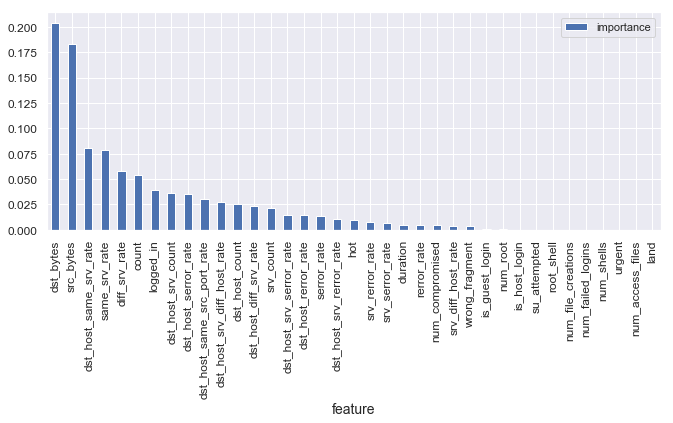

In [0]:
#randomForestClassifier digunakan untuk melihat derajat kepentingan dari setiap variabel data ( column )
#dimensi datanya akan diurutkan berdasarkan tingkat kepentingannya
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [0]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()
#selanjutnya dari hasil pengukuran diambil 15 attributes terpenting
#pada program ini sepertinya tidak digunakan( hanya sebagai informasi )
# create the RFE model and select 15 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'hot',
 'logged_in',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate']

In [0]:
from sklearn.model_selection import train_test_split
#split data yang akan digunakan untuk train dan test data 
#dengan perbandingan 70:30 ( train dan test )
#test disini digunakan untuk menguji model accuracy dari train yang dilakukan
#train_test_split akan mengambil secara random
#X_train = data untuk train ; Y_train = hasil untuk train ( anomaly ; normal )
#X_test = data untuk test ; Y_test = hasil untuk test ( anomaly ; normal )
X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)

In [0]:
print (X_train)

In [0]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#proses learning dengan menggunakan macam macam methode

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
from sklearn import metrics

#menghitung dan membuat matric nilai
#menghitung accuracy dan melihat confusion matrix nya

#dari hasil perhitungan method terbaik adalah Decision Tree Classifier karena accuracy 100%

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9071666840303904

Model Accuracy:
 0.9071679709651809

Confusion matrix:
 [[7000 1245]
 [ 392 8997]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.95      0.85      0.90      8245
      normal       0.88      0.96      0.92      9389

    accuracy                           0.91     17634
   macro avg       0.91      0.90      0.91     17634
weighted avg       0.91      0.91      0.91     17634



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9956333771928133

Model Accuracy:
 1.0

Confusion matrix:
 [[8245    0]
 [   0 9389]]

Classification report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      8245
      normal       1.00      1.00      1.00      9389

In [0]:
# PREDICTING FOR TEST DATA using KNN
# https://www.ritchieng.com/pandas-scikit-learn/
# menguji hasil train dengan mencoba memprediksi untuk menentukan class data
pred_knn = KNN_Classifier.predict(test_df)
pred_NB = BNB_Classifier.predict(test_df)
pred_log = LGR_Classifier.predict(test_df)
pred_dt = DTC_Classifier.predict(test_df)

In [0]:
print(pred_dt)

In [0]:
pred_dt_train = DTC_Classifier.predict(train_x)

In [0]:
print(pred_dt_train)

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [0]:
dot_data = StringIO()
export_graphviz(DTC_Classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

In [0]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


In [0]:
graph.write_png('diabetes.png')


InvocationException: GraphViz's executables not found